# WDC Progression

In [28]:
import pandas as pd
import sqlite3

from utils import DRIVER_COLORS_2022, TEAM_COLORS

con = sqlite3.connect("../data/f1data.sqlite")

In [29]:
query = """
SELECT
  r.date,
  r.round,
  d.code,
  d.forename || ' ' || d.surname AS name,
  ds.position,
  ds.points
FROM driver_standings AS ds
JOIN races r on ds.raceId = r.raceId
JOIN drivers d on ds.driverId = d.driverId
WHERE r.year = 2022
"""

df = pd.read_sql(
  query,
  con,
  index_col="date",
  parse_dates="date"
)

## Top 5 Drivers

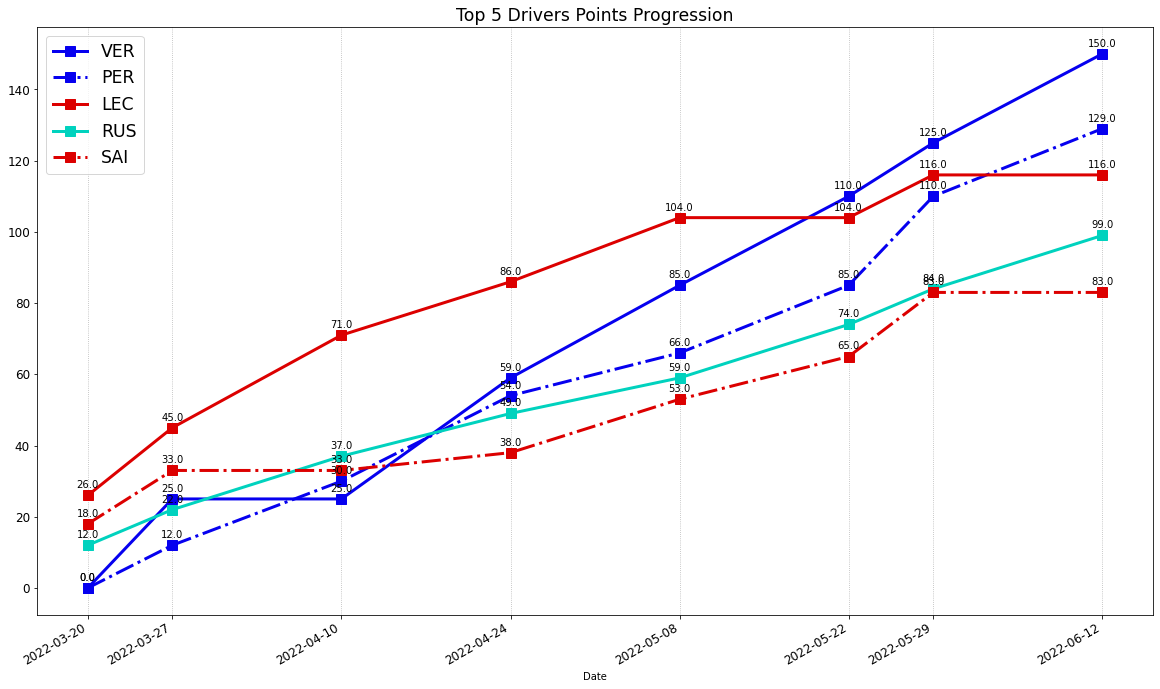

In [30]:
top_5 = df[df.index == df.index.max()].nlargest(5, columns="points")["code"]
pivot = df.pivot(index=None, columns="code", values="points")
pivot.index.rename("Date", inplace=True)

ax = pivot.plot(
  y=top_5,
  color=[DRIVER_COLORS_2022[d].color for d in top_5],
  style=[DRIVER_COLORS_2022[d].style for d in top_5],
  figsize=(20,12),
  fontsize="large",
  linewidth=3,
  marker="s",
  markersize=10,
)
ax.set_title("Top 5 Drivers Points Progression", fontsize="xx-large")
ax.legend(fontsize="xx-large")
ax.set_xticks(pivot.index)
ax.grid(visible=True, which="major", axis="x", linestyle="dotted")

for driver in top_5:
  for d, p in pivot[driver].items():
    ax.text(d, p+2, f"{p}", ha="center")

# WCC Progression

In [31]:
query = """
SELECT
  r.date,
  r.round,
  c.name,
  cs.position,
  cs.points
FROM constructor_standings AS cs
JOIN races r on cs.raceId = r.raceId
JOIN constructors c on cs.constructorId = c.constructorId
WHERE r.year = 2022
"""

df = pd.read_sql(
  query,
  con,
  index_col="date",
  parse_dates="date"
)

## Top 5 Constructors

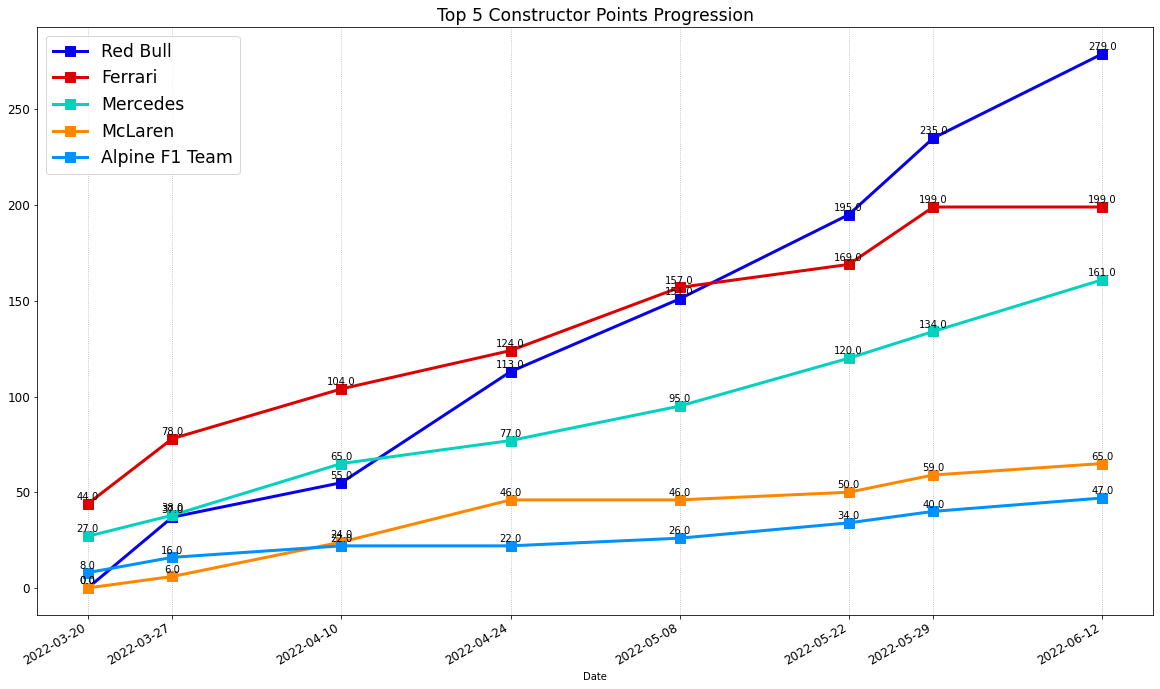

In [32]:
top_5 = df[df.index == df.index.max()].nlargest(5, columns="points")["name"]
pivot = df.pivot(index=None, columns="name", values="points")
pivot.index.rename("Date", inplace=True)

ax = pivot.plot(
  y=top_5,
  color=[TEAM_COLORS[t] for t in top_5],
  figsize=(20,12),
  fontsize="large",
  linewidth=3,
  marker="s",
  markersize=10,
)
ax.set_title("Top 5 Constructor Points Progression", fontsize="xx-large")
ax.legend(fontsize="xx-large")
ax.set_xticks(pivot.index)
ax.grid(visible=True, which="major", axis="x", linestyle="dotted")

for constructor in top_5:
  for d, p in pivot[constructor].items():
    ax.text(d, p+2, f"{p}", ha="center")